In [3]:
import pandas as pd
import sklearn
# from autoPyTorch.api.tabular_classification import TabularClassificationTask
from autoPyTorch.api.tabular_regression import TabularRegressionTask
from matplotlib import pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv( "../wordmap-hackathon-stuff/training_from_eph.csv" )

In [5]:
y = data.output
X = data.loc[:,data.columns[5:]]
y[0] = .999 #This is a hack so that the regressor doesn't think this is state data.

/tmp/ipykernel_84363/1541945600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[0] = .999 #This is a hack so that the regressor doesn't think this is state data.


<IPython.core.display.Javascript object>


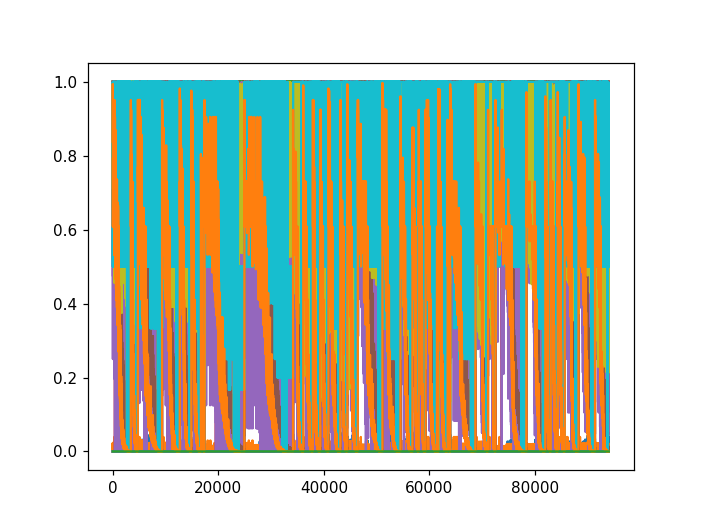

In [6]:
plt.plot(X)

In [8]:
# api = TabularClassificationTask(
#     # To maintain logs of the run, you can uncomment the
#     # Following lines
#     # temporary_directory='./tmp/autoPyTorch_example_tmp_01',
#     # output_directory='./tmp/autoPyTorch_example_out_01',
#     # delete_tmp_folder_after_terminate=False,
#     # delete_output_folder_after_terminate=False,
#     seed=43,
# )
api = TabularRegressionTask(
        # To maintain logs of the run, you can uncomment the
    # Following lines
    temporary_directory='./tmp/autoPyTorch_example_tmp_04',
    output_directory='./tmp/autoPyTorch_example_out_04',
    delete_tmp_folder_after_terminate=False,
    delete_output_folder_after_terminate=False,
    seed=45,
)

In [9]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    random_state=1,
)


api.search(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test.copy(),
    y_test=y_test.copy(),
    dataset_name='xor',
    #optimize_metric='accuracy',
    optimize_metric='r2',
    #total_walltime_limit=3000,
    total_walltime_limit=2220,
    func_eval_time_limit_secs=500,
    memory_limit=4096*10
)


[ERROR] [2022-03-04 08:50:26,007:Client-AutoPyTorch:xor:45] Traditional prediction for knn failed with run state StatusType.CRASHED.
Additional info:
traceback: Traceback (most recent call last):
  File "/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/autoPyTorch/evaluation/tae.py", line 39, in fit_predict_try_except_decorator
    ta(queue=queue, **kwargs)
  File "/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/autoPyTorch/evaluation/train_evaluator.py", line 485, in eval_function
    evaluator.fit_predict_and_loss()
  File "/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/autoPyTorch/evaluation/train_evaluator.py", line 163, in fit_predict_and_loss
    y_train_pred, y_opt_pred, y_valid_pred, y_test_pred = self._fit_and_predict(pipeline, split_id,
  File "/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/autoPyTorch/evaluation/train_ev

/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/smac/intensification/parallel_scheduling.py:149: UserWarning: Hyperband is intended to be used with more than 1 worker but num_workers=1
  warnings.warn("{} is intended to be used "
/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/smac/intensification/parallel_scheduling.py:149: UserWarning: Hyperband is intended to be used with more than 1 worker but num_workers=1
  warnings.warn("{} is intended to be used "
/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/smac/intensification/parallel_scheduling.py:149: UserWarning: Hyperband is intended to be used with more than 1 worker but num_workers=1
  warnings.warn("{} is intended to be used "
/home/lansford/Sync/projects/tf_over/hackathon/automl/venv/lib/python3.8/site-packages/smac/intensification/parallel_scheduling.py:149: UserWarning: Hyperband is intended to be used with more t

In [10]:
y_pred = api.predict(X)
y_     = y

In [11]:
y_pred_ = np.asarray([x[0] for x in y_pred])

<IPython.core.display.Javascript object>


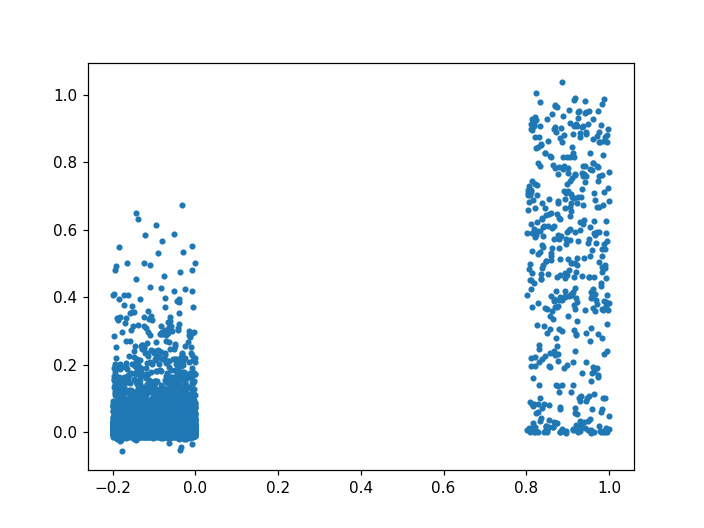

In [12]:
%matplotlib notebook
import random
y_shuff = [x+(random.random()*.2-.2) for x in y_]
plt.plot(y_shuff,y_pred_,'.')

In [13]:
#data[:,fishy_index[0][0]]
fishy_index = np.where((y_<.4)&(y_pred_>.5))
data.loc[fishy_index[0][1],:]

output                                                 0.0
source                                                n:ἐν
target                                                n:in
f:sLang                                               ugnt
f:tLang                                                 en
f1:sourceCorpusPermutationsFrequencyRatio           0.0214
f2:targetCorpusPermutationsFrequencyRatio         0.029793
f3:sourceAlignmentMemoryFrequencyRatio                   0
f4:targetAlignmentMemoryFrequencyRatio                   0
f5:frequencyRatioCorpusFiltered                   0.166667
f6:frequencyRatioAlignmentMemoryFiltered                 0
f7:sourceCorpusLemmaPermutationsFrequencyRatio         0.0
f8:targetCorpusLemmaPermutationsFrequencyRatio         0.0
f9:sourceAlignmentMemoryLemmaFrequencyRatio              0
f10:targetAlignmentMemoryLemmaFrequencyRatio             0
f11:lemmaFrequencyRatioCorpusFiltered                  0.0
f12:lemmaFrequencyRatioAlignmentMemoryFiltered          

In [14]:
data.loc[fishy_index[0],["source","target"]]

,source,target
1864,n:τοῖς,n:the
5377,n:ἐν,n:in
6174,n:εὐλογίᾳ,n:spiritual
20942,n:τοῦ,n:the
28139,n:καὶ,n:and
34188,n:ἠγάπησεν,n:loved
36096,n:νεκροὺς,n:trespasses
39777,n:χριστοῦ,n:christ
63680,n:ἀγαπητά,n:children
82054,n:κυρίῳ,n:lord


In [15]:
fishy_low = np.where((y_>.4)&(y_pred_<.001))
#print(fishy_low[0][2])
data.loc[fishy_low[0][1],:]

output                                                     1.0
source                                                    n:ἣν
target                                            n:with:which
f:sLang                                                   ugnt
f:tLang                                                     en
f1:sourceCorpusPermutationsFrequencyRatio             0.004739
f2:targetCorpusPermutationsFrequencyRatio              0.02381
f3:sourceAlignmentMemoryFrequencyRatio                       0
f4:targetAlignmentMemoryFrequencyRatio                       0
f5:frequencyRatioCorpusFiltered                            1.0
f6:frequencyRatioAlignmentMemoryFiltered                     0
f7:sourceCorpusLemmaPermutationsFrequencyRatio             0.0
f8:targetCorpusLemmaPermutationsFrequencyRatio             0.0
f9:sourceAlignmentMemoryLemmaFrequencyRatio                  0
f10:targetAlignmentMemoryLemmaFrequencyRatio                 0
f11:lemmaFrequencyRatioCorpusFiltered                  

In [16]:
y_pred

array([[7.10594214e-02],
       [1.22876388e-01],
       [9.01432004e-03],
       ...,
       [5.32125705e-05],
       [5.50343102e-05],
       [4.91333340e-05]])

In [17]:
#loading and saving
#https://automl.github.io/Auto-PyTorch/development/examples/40_advanced/example_visualization.html#sphx-glr-examples-40-advanced-example-visualization-py

In [21]:
#inspecting results
#https://automl.github.io/Auto-PyTorch/master/manual.html#inspecting-the-results
with open( "models_out.txt", "wt" ) as fout:
    fout.write(api.show_models())
    fout.write(api.sprint_statistics())